In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import pylab

In [299]:
ds = pd.read_csv('/content/Arquivo_Salarios_Colaboradores_2020.csv',sep=';', decimal=',')
ds.head()

,Ordem,salario,idade,tempocasa,escolar,qproj_estra,proj_sustent,proj_6sigma,proj_social,notaavalia
0,1,8000.80,25,4,11,1,1,1,0,79.38
1,2,8500.17,24,5,11,0,0,1,0,84.13
2,3,3350.59,22,1,12,0,0,0,0,46.15
3,4,9500.24,28,4,14,1,0,0,1,83.85
4,5,1500.63,12,2,12,0,0,0,1,73.64


In [300]:
ds.shape

(180, 10)

In [301]:
ds.dtypes

Ordem             int64
salario         float64
idade             int64
tempocasa         int64
escolar           int64
qproj_estra       int64
proj_sustent      int64
proj_6sigma       int64
proj_social       int64
notaavalia      float64
dtype: object

In [302]:
ds.describe()

,Ordem,salario,idade,tempocasa,escolar,qproj_estra,proj_sustent,proj_6sigma,proj_social,notaavalia
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,90.500000,8539.490667,31.038889,9.072222,12.583333,1.272222,0.277778,0.550000,0.500000,71.738111
std,52.105662,4729.507585,9.404245,5.609281,2.569427,1.218253,0.449153,0.498881,0.501395,15.993931
min,1.000000,1500.630000,12.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,34.480000
25%,45.750000,5491.230000,24.000000,5.000000,11.000000,1.000000,0.000000,0.000000,0.000000,60.407500
50%,90.500000,7551.125000,28.000000,7.000000,13.000000,1.000000,0.000000,1.000000,0.500000,72.080000
75%,135.250000,10584.685000,36.000000,13.000000,14.000000,1.000000,1.000000,1.000000,1.000000,83.850000
max,180.000000,25329.910000,65.000000,25.000000,19.000000,7.000000,1.000000,1.000000,1.000000,98.960000


Coeficiente de Variabilidade

In [303]:
idade_cv = ds.idade.std() / ds.idade.mean()
print(idade_cv)

0.30298264925880847


Correlação Pearson - Indicado para variáveis quantitativas

In [304]:
ds.corr()

,Ordem,salario,idade,tempocasa,escolar,qproj_estra,proj_sustent,proj_6sigma,proj_social,notaavalia
Ordem,1.000000,0.190577,0.211800,0.144168,0.372692,0.121232,0.163754,-0.008489,0.134717,-0.015925
salario,0.190577,1.000000,0.601918,0.332923,0.492168,0.518249,-0.017883,0.359549,0.237473,0.078258
idade,0.211800,0.601918,1.000000,0.215992,0.298922,0.489621,-0.100444,0.164504,-0.004147,0.038592
tempocasa,0.144168,0.332923,0.215992,1.000000,-0.058369,0.087035,-0.039051,0.115490,-0.032775,0.069828
escolar,0.372692,0.492168,0.298922,-0.058369,1.000000,0.297009,-0.102464,0.153629,0.175625,-0.059922
qproj_estra,0.121232,0.518249,0.489621,0.087035,0.297009,1.000000,-0.057288,0.248645,0.260660,0.093075
proj_sustent,0.163754,-0.017883,-0.100444,-0.039051,-0.102464,-0.057288,1.000000,-0.062330,0.248069,0.051128
proj_6sigma,-0.008489,0.359549,0.164504,0.115490,0.153629,0.248645,-0.062330,1.000000,0.055835,0.069299
proj_social,0.134717,0.237473,-0.004147,-0.032775,0.175625,0.260660,0.248069,0.055835,1.000000,0.115789
notaavalia,-0.015925,0.078258,0.038592,0.069828,-0.059922,0.093075,0.051128,0.069299,0.115789,1.000000


Correlação de Spearman - Correlação com variáveis não exigindo que elas sejam quantitativas

In [305]:
ds.corr(method="spearman")

,Ordem,salario,idade,tempocasa,escolar,qproj_estra,proj_sustent,proj_6sigma,proj_social,notaavalia
Ordem,1.000000,0.179837,0.266635,0.197571,0.382644,0.081980,0.163754,-0.008489,0.134717,-0.011477
salario,0.179837,1.000000,0.493272,0.315730,0.482820,0.440877,-0.021484,0.358799,0.253290,0.060057
idade,0.266635,0.493272,1.000000,0.142851,0.341025,0.384767,-0.059808,0.111462,-0.013823,0.074060
tempocasa,0.197571,0.315730,0.142851,1.000000,-0.033843,0.051508,-0.043960,0.135880,-0.066419,0.067998
escolar,0.382644,0.482820,0.341025,-0.033843,1.000000,0.313162,-0.072782,0.144702,0.201308,-0.029819
qproj_estra,0.081980,0.440877,0.384767,0.051508,0.313162,1.000000,-0.106189,0.251917,0.198336,0.060825
proj_sustent,0.163754,-0.021484,-0.059808,-0.043960,-0.072782,-0.106189,1.000000,-0.062330,0.248069,0.043447
proj_6sigma,-0.008489,0.358799,0.111462,0.135880,0.144702,0.251917,-0.062330,1.000000,0.055835,0.049970
proj_social,0.134717,0.253290,-0.013823,-0.066419,0.201308,0.198336,0.248069,0.055835,1.000000,0.112483
notaavalia,-0.011477,0.060057,0.074060,0.067998,-0.029819,0.060825,0.043447,0.049970,0.112483,1.000000


(array([24., 40., 48., 27., 12., 14.,  8.,  2.,  2.,  3.]),
 array([ 1500.63 ,  3883.558,  6266.486,  8649.414, 11032.342, 13415.27 ,
        15798.198, 18181.126, 20564.054, 22946.982, 25329.91 ]),
 <a list of 10 Patch objects>)

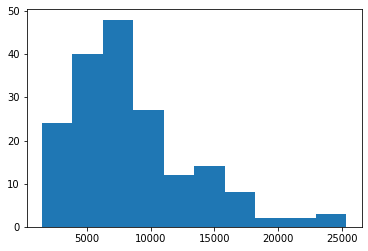

In [306]:
plt.hist(ds.salario)

(array([5.59535720e-05, 9.32559533e-05, 1.11907144e-04, 6.29477685e-05,
        2.79767860e-05, 3.26395836e-05, 1.86511907e-05, 4.66279766e-06,
        4.66279766e-06, 6.99419650e-06]),
 array([ 1500.63 ,  3883.558,  6266.486,  8649.414, 11032.342, 13415.27 ,
        15798.198, 18181.126, 20564.054, 22946.982, 25329.91 ]),
 <a list of 10 Patch objects>)

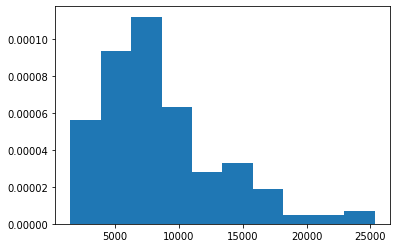

In [307]:
plt.hist(ds.salario,density=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


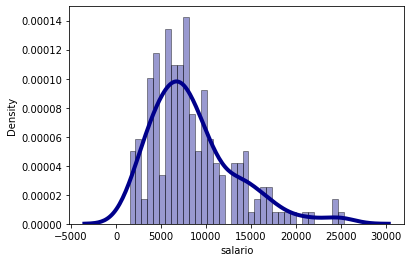

In [308]:
sns.distplot(ds.salario, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

{'boxes': [<matplotlib.lines.Line2D at 0x7f58699d3510>],
 'caps': [<matplotlib.lines.Line2D at 0x7f58699d2590>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f58699e85d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f58699e8090>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f58699d3ad0>,
  <matplotlib.lines.Line2D at 0x7f58699d2050>]}

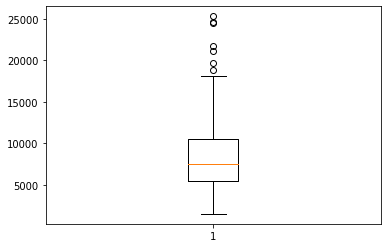

In [309]:
plt.boxplot(ds.salario)

Transformando variáveis

In [310]:
ds['sqrt_salario'] = ds.loc[:,'salario'].apply(lambda x : np.sqrt(x))

In [311]:
ds.dtypes

Ordem             int64
salario         float64
idade             int64
tempocasa         int64
escolar           int64
qproj_estra       int64
proj_sustent      int64
proj_6sigma       int64
proj_social       int64
notaavalia      float64
sqrt_salario    float64
dtype: object

In [312]:
ds.loc[0:10,['salario','sqrt_salario']]

,salario,sqrt_salario
0,8000.80,89.447191
1,8500.17,92.196367
2,3350.59,57.884281
3,9500.24,97.469175
4,1500.63,38.737966
5,5500.22,74.163468
6,3500.06,59.161305
7,13750.67,117.263251
8,4750.70,68.925322
9,6750.83,82.163435


In [313]:
ds['f_salario'] = ds.loc[:,'sqrt_salario'].apply(lambda x : x**2)

In [314]:
ds.loc[0:10,['salario','f_salario']]

,salario,f_salario
0,8000.80,8000.80
1,8500.17,8500.17
2,3350.59,3350.59
3,9500.24,9500.24
4,1500.63,1500.63
5,5500.22,5500.22
6,3500.06,3500.06
7,13750.67,13750.67
8,4750.70,4750.70
9,6750.83,6750.83


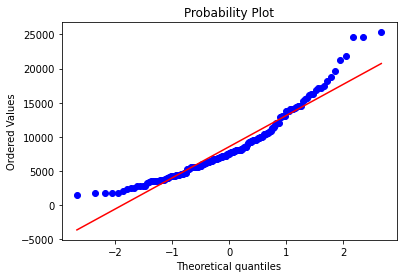

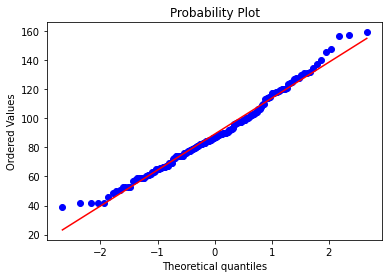

In [315]:
stats.probplot(ds.salario, dist="norm", plot=pylab)
pylab.show()
stats.probplot(ds.sqrt_salario, dist="norm", plot=pylab)
pylab.show()

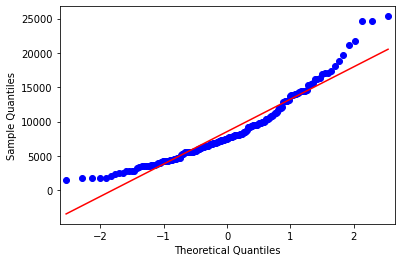

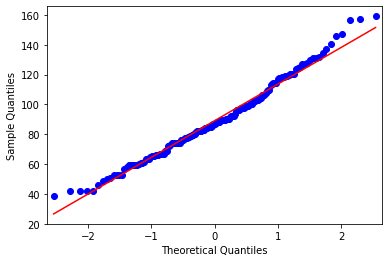

In [316]:
sm.qqplot(ds.salario, line='s')
pylab.show()
sm.qqplot(ds.sqrt_salario, line='s')
pylab.show()

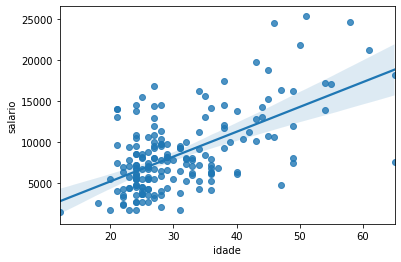

In [317]:
sns.regplot(x=ds["idade"], y=ds["salario"])

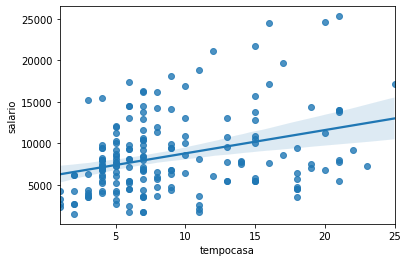

In [318]:
sns.regplot(x=ds["tempocasa"], y=ds["salario"])

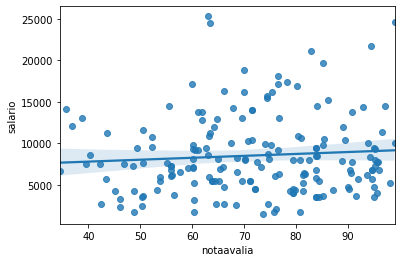

In [319]:
sns.regplot(x=ds["notaavalia"], y=ds["salario"])

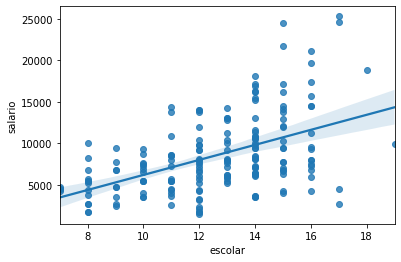

In [320]:
sns.regplot(x=ds["escolar"], y=ds["salario"])

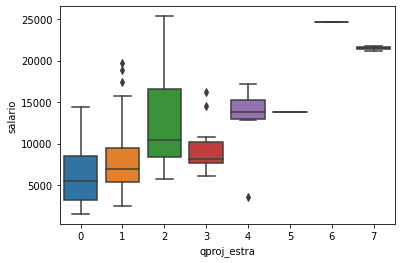

In [321]:
ax = sns.boxplot(x="qproj_estra", y="salario", data=ds)

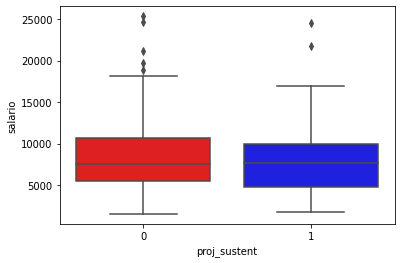

In [322]:
ax = sns.boxplot(x="proj_sustent", y="salario", data=ds, palette={'red','blue'})

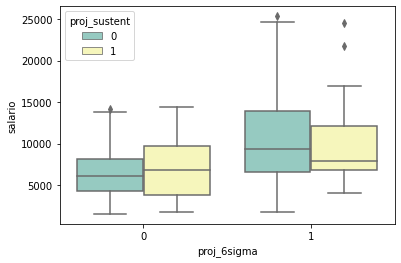

In [323]:
ax = sns.boxplot(x="proj_6sigma", y="salario", hue="proj_sustent", data=ds, palette="Set3")

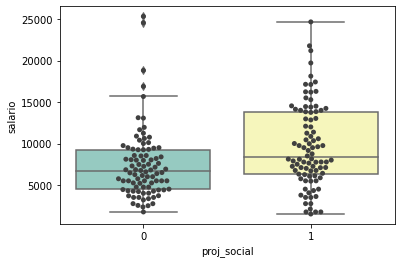

In [324]:
ax = sns.boxplot(x="proj_social", y="salario", data=ds, palette="Set3")
ax = sns.swarmplot(x="proj_social", y="salario", data=ds, color=".25")

In [325]:
 ds.query('idade >= 18')[['salario','idade']]

,salario,idade
0,8000.80,25
1,8500.17,24
2,3350.59,22
3,9500.24,28
5,5500.22,26
...,...,...
175,7896.70,36
176,10575.13,26
177,6309.66,36
178,2100.68,28


In [326]:
ds = ds.drop(columns=['f_salario','sqrt_salario'])

In [327]:
salario_semout =  ds.query('idade >= 18').copy()

In [328]:
salario_semout.shape

(179, 10)

In [329]:
salario_semout.corr()

,Ordem,salario,idade,tempocasa,escolar,qproj_estra,proj_sustent,proj_6sigma,proj_social,notaavalia
Ordem,1.000000,0.179330,0.196895,0.134160,0.373488,0.112805,0.159434,-0.018859,0.145417,-0.014943
salario,0.179330,1.000000,0.595562,0.325864,0.493420,0.514295,-0.023224,0.353741,0.248048,0.079753
idade,0.196895,0.595562,1.000000,0.204932,0.299855,0.484828,-0.108854,0.154273,0.007300,0.040414
tempocasa,0.134160,0.325864,0.204932,1.000000,-0.060255,0.080242,-0.043674,0.108537,-0.025900,0.070990
escolar,0.373488,0.493420,0.299855,-0.060255,1.000000,0.296630,-0.103378,0.152767,0.177419,-0.059782
qproj_estra,0.112805,0.514295,0.484828,0.080242,0.296630,1.000000,-0.061170,0.243756,0.268081,0.094065
proj_sustent,0.159434,-0.023224,-0.108854,-0.043674,-0.103378,-0.061170,1.000000,-0.066459,0.252511,0.051598
proj_6sigma,-0.018859,0.353741,0.154273,0.108537,0.152767,0.243756,-0.066459,1.000000,0.062399,0.070279
proj_social,0.145417,0.248048,0.007300,-0.025900,0.177419,0.268081,0.252511,0.062399,1.000000,0.115451
notaavalia,-0.014943,0.079753,0.040414,0.070990,-0.059782,0.094065,0.051598,0.070279,0.115451,1.000000


In [330]:
salario_semout.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'),axis=1)

,Ordem,salario,idade,tempocasa,escolar,qproj_estra,proj_sustent,proj_6sigma,proj_social,notaavalia
Ordem,1.0,0.18,0.2,0.13,0.37,0.11,0.16,-0.019,0.15,-0.015
salario,0.18,1.0,0.6,0.33,0.49,0.51,-0.023,0.35,0.25,0.08
idade,0.2,0.6,1.0,0.2,0.3,0.48,-0.11,0.15,0.0073,0.04
tempocasa,0.13,0.33,0.2,1.0,-0.06,0.08,-0.044,0.11,-0.026,0.071
escolar,0.37,0.49,0.3,-0.06,1.0,0.3,-0.1,0.15,0.18,-0.06
qproj_estra,0.11,0.51,0.48,0.08,0.3,1.0,-0.061,0.24,0.27,0.094
proj_sustent,0.16,-0.023,-0.11,-0.044,-0.1,-0.061,1.0,-0.066,0.25,0.052
proj_6sigma,-0.019,0.35,0.15,0.11,0.15,0.24,-0.066,1.0,0.062,0.07
proj_social,0.15,0.25,0.0073,-0.026,0.18,0.27,0.25,0.062,1.0,0.12
notaavalia,-0.015,0.08,0.04,0.071,-0.06,0.094,0.052,0.07,0.12,1.0


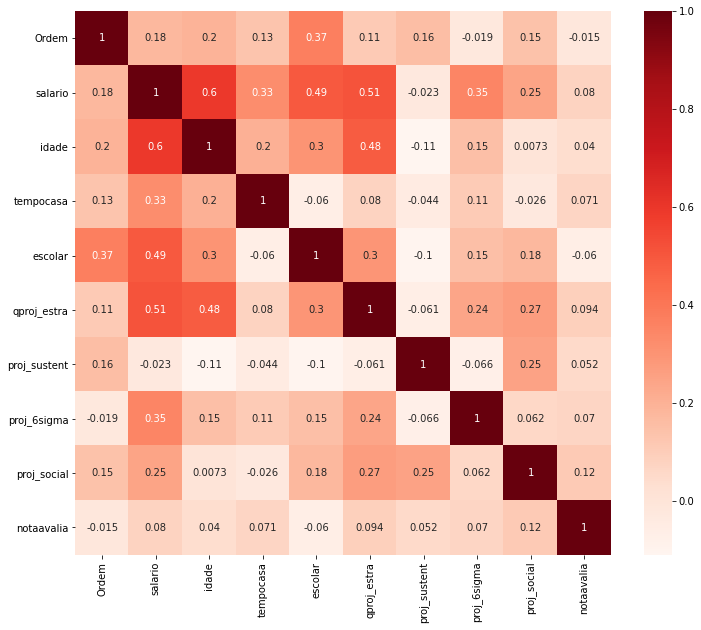

In [331]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = salario_semout.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [332]:
salario_semout.corr()
cor_target = abs(cor["salario"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

salario        1.000000
idade          0.595562
tempocasa      0.325864
escolar        0.493420
qproj_estra    0.514295
proj_6sigma    0.353741
proj_social    0.248048
Name: salario, dtype: float64

#Alguns algorítmos precisam que as variáveis sejam padronizadas ou normalizadas

As duas técnicas tem o mesmo objetivo: transformar todas as variáveis na mesma ordem de grandeza. E a diferença básica é que padronizar as variáveis irá resultar em uma média igual a 0 e um desvio padrão igual a 1. Já normalizar tem como objetivo colocar as variáveis dentro do intervalo de 0 e 1, caso tenha resultado negativo -1 e 1.


**Normatizando / Normalizando uma variável - Transforme recursos dimensionando cada recurso para um determinado intervalo.**

Este estimador dimensiona e traduz cada característica individualmente, de modo que esteja no intervalo dado no conjunto de treinamento, por exemplo, entre zero e um.

A transformação é dada por:

X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min
onde min, max = feature_range.

Essa transformação é freqüentemente usada como uma alternativa para a escala de variação de unidade de média zero.

In [333]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
salario_semout['sal_normal'] = scaler.fit_transform(salario_semout[['salario']])

In [334]:
salario_semout.describe()

,Ordem,salario,idade,tempocasa,escolar,qproj_estra,proj_sustent,proj_6sigma,proj_social,notaavalia,sal_normal
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,90.977654,8578.813911,31.145251,9.111732,12.586592,1.279330,0.279330,0.553073,0.497207,71.727486,0.289598
std,51.855130,4713.173605,9.321421,5.599842,2.576261,1.217922,0.449928,0.498570,0.501395,16.038158,0.199882
min,1.000000,1750.180000,18.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,34.480000,0.000000
25%,46.500000,5500.435000,24.000000,5.000000,11.000000,1.000000,0.000000,0.000000,0.000000,60.395000,0.159046
50%,91.000000,7600.410000,28.000000,7.000000,13.000000,1.000000,0.000000,1.000000,0.000000,72.080000,0.248104
75%,135.500000,10594.240000,36.000000,13.000000,14.000000,1.000000,1.000000,1.000000,1.000000,83.850000,0.375070
max,180.000000,25329.910000,65.000000,25.000000,19.000000,7.000000,1.000000,1.000000,1.000000,98.960000,1.000000


** Em todo dataset **

In [335]:
sal_normalMinMax = salario_semout.drop(columns=['sal_normal'])
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
sal_MinMax = pd.DataFrame(scaler.fit_transform(sal_normalMinMax), columns=sal_normalMinMax.columns, index=sal_normalMinMax.index)
sal_MinMax.describe()

,Ordem,salario,idade,tempocasa,escolar,qproj_estra,proj_sustent,proj_6sigma,proj_social,notaavalia
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,0.502668,0.289598,0.279686,0.337989,0.465549,0.182761,0.279330,0.553073,0.497207,0.577660
std,0.289693,0.199882,0.198328,0.233327,0.214688,0.173989,0.449928,0.498570,0.501395,0.248731
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.254190,0.159046,0.127660,0.166667,0.333333,0.142857,0.000000,0.000000,0.000000,0.401908
50%,0.502793,0.248104,0.212766,0.250000,0.500000,0.142857,0.000000,1.000000,0.000000,0.583127
75%,0.751397,0.375070,0.382979,0.500000,0.583333,0.142857,1.000000,1.000000,1.000000,0.765664
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Padronize os recursos removendo a média e escalonando para a variância da unidade**

A pontuação padrão de uma amostra **x** é calculada como:

z = (x - u) / s

onde **u** é a média das amostras de treinamento ou zero se with_mean=False, e **s** é o desvio padrão das amostras de treinamento ou um se with_std=False.

In [336]:
from sklearn.preprocessing import StandardScaler
sc_sal = StandardScaler()
salario_semout['sal_normalstd'] = sc_sal.fit_transform(salario_semout[['salario']])

In [337]:
salario_semout.describe()

,Ordem,salario,idade,tempocasa,escolar,qproj_estra,proj_sustent,proj_6sigma,proj_social,notaavalia,sal_normal,sal_normalstd
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,1.790000e+02
mean,90.977654,8578.813911,31.145251,9.111732,12.586592,1.279330,0.279330,0.553073,0.497207,71.727486,0.289598,1.240473e-16
std,51.855130,4713.173605,9.321421,5.599842,2.576261,1.217922,0.449928,0.498570,0.501395,16.038158,0.199882,1.002805e+00
min,1.000000,1750.180000,18.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,34.480000,0.000000,-1.452904e+00
25%,46.500000,5500.435000,24.000000,5.000000,11.000000,1.000000,0.000000,0.000000,0.000000,60.395000,0.159046,-6.549756e-01
50%,91.000000,7600.410000,28.000000,7.000000,13.000000,1.000000,0.000000,1.000000,0.000000,72.080000,0.248104,-2.081715e-01
75%,135.500000,10594.240000,36.000000,13.000000,14.000000,1.000000,1.000000,1.000000,1.000000,83.850000,0.375070,4.288150e-01
max,180.000000,25329.910000,65.000000,25.000000,19.000000,7.000000,1.000000,1.000000,1.000000,98.960000,1.000000,3.564071e+00


In [338]:
sal_normalStd = salario_semout.drop(columns=['sal_normal','sal_normalstd'])
from sklearn.preprocessing import StandardScaler
sc_sal = StandardScaler()
sal_Std = pd.DataFrame(sc_sal.fit_transform(sal_normalStd), columns=sal_normalStd.columns, index=sal_normalStd.index)
sal_Std.describe()

,Ordem,salario,idade,tempocasa,escolar,qproj_estra,proj_sustent,proj_6sigma,proj_social,notaavalia
count,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02
mean,-9.055450e-17,1.240473e-16,-8.435214e-17,1.910328e-16,-4.155583e-17,8.218131e-18,-6.946647e-17,1.736662e-17,6.946647e-17,-1.200157e-16
std,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00
min,-1.740041e+00,-1.452904e+00,-1.414175e+00,-1.452628e+00,-2.174571e+00,-1.053366e+00,-6.225728e-01,-1.112430e+00,-9.944289e-01,-2.328944e+00
25%,-8.601351e-01,-6.549756e-01,-7.686912e-01,-7.363182e-01,-6.175781e-01,-2.299926e-01,-6.225728e-01,-1.112430e+00,-9.944289e-01,-7.085773e-01
50%,4.321472e-04,-2.081715e-01,-3.383684e-01,-3.781634e-01,1.609182e-01,-2.299926e-01,-6.225728e-01,8.989331e-01,-9.944289e-01,2.204136e-02
75%,8.609994e-01,4.288150e-01,5.222773e-01,6.963009e-01,5.501664e-01,-2.299926e-01,1.606238e+00,8.989331e-01,1.005602e+00,7.579747e-01
max,1.721567e+00,3.564071e+00,3.642118e+00,2.845229e+00,2.496407e+00,4.710249e+00,1.606238e+00,8.989331e-01,1.005602e+00,1.702746e+00


In [339]:
normalized_Std=(sal_normalStd-sal_normalStd.mean())/sal_normalStd.std()
normalized_Std.describe()

,Ordem,salario,idade,tempocasa,escolar,qproj_estra,proj_sustent,proj_6sigma,proj_social,notaavalia
count,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02
mean,-1.860709e-16,1.699448e-16,-1.997161e-16,-3.349276e-17,-3.572561e-16,-5.659656e-17,7.939025e-17,-6.202363e-17,7.690930e-17,1.667195e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.735174e+00,-1.448840e+00,-1.410220e+00,-1.448564e+00,-2.168488e+00,-1.050420e+00,-6.208313e-01,-1.109318e+00,-9.916473e-01,-2.322429e+00
25%,-8.577291e-01,-6.531435e-01,-7.665410e-01,-7.342585e-01,-6.158506e-01,-2.293493e-01,-6.208313e-01,-1.109318e+00,-9.916473e-01,-7.065952e-01
50%,4.309384e-04,-2.075892e-01,-3.374219e-01,-3.771056e-01,1.604681e-01,-2.293493e-01,-6.208313e-01,8.964186e-01,-9.916473e-01,2.197970e-02
75%,8.585910e-01,4.276155e-01,5.208163e-01,6.943532e-01,5.486275e-01,-2.293493e-01,1.601745e+00,8.964186e-01,1.002789e+00,7.558545e-01
max,1.716751e+00,3.554101e+00,3.631930e+00,2.837271e+00,2.489424e+00,4.697074e+00,1.601745e+00,8.964186e-01,1.002789e+00,1.697983e+00


In [340]:
normalized_MinMax=(sal_normalMinMax-sal_normalMinMax.min())/(sal_normalMinMax.max()-sal_normalMinMax.min())
normalized_MinMax.describe()

,Ordem,salario,idade,tempocasa,escolar,qproj_estra,proj_sustent,proj_6sigma,proj_social,notaavalia
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,0.502668,0.289598,0.279686,0.337989,0.465549,0.182761,0.279330,0.553073,0.497207,0.577660
std,0.289693,0.199882,0.198328,0.233327,0.214688,0.173989,0.449928,0.498570,0.501395,0.248731
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.254190,0.159046,0.127660,0.166667,0.333333,0.142857,0.000000,0.000000,0.000000,0.401908
50%,0.502793,0.248104,0.212766,0.250000,0.500000,0.142857,0.000000,1.000000,0.000000,0.583127
75%,0.751397,0.375070,0.382979,0.500000,0.583333,0.142857,1.000000,1.000000,1.000000,0.765664
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [341]:
sal_MinMax.describe()

,Ordem,salario,idade,tempocasa,escolar,qproj_estra,proj_sustent,proj_6sigma,proj_social,notaavalia
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,0.502668,0.289598,0.279686,0.337989,0.465549,0.182761,0.279330,0.553073,0.497207,0.577660
std,0.289693,0.199882,0.198328,0.233327,0.214688,0.173989,0.449928,0.498570,0.501395,0.248731
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.254190,0.159046,0.127660,0.166667,0.333333,0.142857,0.000000,0.000000,0.000000,0.401908
50%,0.502793,0.248104,0.212766,0.250000,0.500000,0.142857,0.000000,1.000000,0.000000,0.583127
75%,0.751397,0.375070,0.382979,0.500000,0.583333,0.142857,1.000000,1.000000,1.000000,0.765664
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Transformando as variáveis em Categóricas #

In [ ]:
from sklearn.preprocessing import LabelEncoder 

var_mod =['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status'] 

le = LabelEncoder() 
# Transformando as variáveis em Dummies #
for i in var_mod: 
  df[i] = le.fit_transform(df[i]) 

df.dtypes

# Transformando as variáveis em Dummies #

### Usando Pandas get_dummies ###

In [8]:
from sklearn.datasets import load_iris
sns.set()
%matplotlib inline

In [25]:
#Iris Plot
iris = load_iris()
n_samples, m_features = iris.data.shape

In [26]:
#Load Data
X, y = iris.data, iris.target
D_target_dummy = dict(zip(np.arange(iris.target_names.shape[0]), iris.target_names))

In [33]:
DF_data = pd.DataFrame(X,columns=iris.feature_names)
DF_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [34]:
DF_data["target"] = pd.Series(y).map(D_target_dummy)
DF_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [38]:
DF_data = pd.get_dummies(DF_data, columns=['target'])
DF_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_setosa,target_versicolor,target_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [29]:
df = pd.DataFrame({'P': ['p', 'q', 'p'], 'Q': ['q', 'p', 'r'],
                   'R': [2, 3, 4]})

In [30]:
df.head()

,P,Q,R
0,p,q,2
1,q,p,3
2,p,r,4


### Usando scikit-learn OneHotEncoder ###

In [87]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
DF_data = pd.DataFrame(X,columns=iris.feature_names)
DF_data["target"] = pd.Series(y).map(D_target_dummy)
DF_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [88]:
Enc_ohe, Enc_label = OneHotEncoder(), LabelEncoder()
DF_data["Dummies"] = Enc_label.fit_transform(DF_data["target"])

### Se quisesse que a variável target ficasse como categórica ###

In [89]:
DF_data.Dummies.value_counts()

2    50
1    50
0    50
Name: Dummies, dtype: int64

### Se quisesse que uma variável categórica ficasse como dummy ###

In [90]:
DF_dummies = pd.DataFrame(Enc_ohe.fit_transform(DF_data[["Dummies"]]).todense(), columns = Enc_label.classes_)
DF_dummies.head()

,setosa,versicolor,virginica
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [91]:
DF_data = DF_data.join(DF_dummies)

In [92]:
DF_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Dummies,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,0,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,setosa,0,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,setosa,0,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,setosa,0,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,setosa,0,1.0,0.0,0.0


In [93]:
DF_data = DF_data.drop(columns=['Dummies', 'target'])

In [94]:
DF_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,1.0,0.0,0.0


**Para aprendizado de máquina, é quase certo que você queira usar sklearn.OneHotEncoder. Para outras tarefas, como análises simples, você pode usar pd.get_dummies, o que é um pouco mais conveniente.**

Observe que sklearn.OneHotEncoder foi atualizado na versão mais recente para que **aceite strings para variáveis categóricas**, bem como inteiros.

O ponto crucial é que o sklearn encoder cria uma função que **persiste** e pode **então ser aplicada a novos conjuntos de dados que usam as mesmas variáveis categóricas, com resultados consistentes.**

<code>
from sklearn.preprocessing import OneHotEncoder

#Create the encoder.
encoder = OneHotEncoder(handle_unknown="ignore")
encoder.fit(X_train)    # Assume for simplicity all features are categorical.

#Apply the encoder.
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)
    
</code>

Observe como aplicamos o mesmo codificador que criamos X_train ao novo conjunto de dados X_test.

Considere o que acontece se X_test contiver níveis diferentes de X_train uma de suas variáveis. Por exemplo, digamos que X_train["color"] contém apenas "red" e "green", mas além desses, X_test["color"] às vezes contém "blue".

Se usarmos pd.get_dummies, X_test acabará com uma "color_blue"coluna adicional que X_train não tem, e a inconsistência provavelmente quebrará nosso código mais tarde, especialmente se estivermos alimentando X_test um sklearnmodel no qual treinamos X_train.

E se quisermos processar os dados como este na produção, onde recebemos um único exemplo de cada vez, pd.get_dummies não será útil.

OneHotEncoder por outro lado, depois de criar o codificador, podemos reutilizá-lo para produzir a mesma saída todas as vezes, com colunas apenas para "red" e "green". E podemos controlar explicitamente o que acontece quando ele encontra o novo nível "blue": se pensarmos que isso é impossível, podemos dizer para ele lançar um erro com handle_unknown="error"; caso contrário, podemos dizer para continuar e simplesmente definir as colunas vermelha e verde como 0, com handle_unknown="ignore".

# Agrupando as variáveis #

### O binning (ou bucketing) de dados agrupa os dados em bins (ou buckets), no sentido de que substitui os valores contidos em um pequeno intervalo por um único valor representativo para esse intervalo. Às vezes, binning melhora a precisão em modelos preditivos. ###

In [148]:
df = pd.read_csv('C:/Users/USUARIO/Google Drive/DataScience/DataSets/Banco.csv',sep=';')

In [149]:
df.dtypes

Unnamed: 0          int64
id                  int64
datanasc           object
sexo               object
estudo              int64
catemp             object
salario           float64
salarin           float64
temp_ser            int64
cartao_credito      int64
Emprestimos        object
data_atual         object
idade               int64
dtype: object

In [150]:
df.head()

,Unnamed: 0,id,datanasc,sexo,estudo,catemp,salario,salarin,temp_ser,cartao_credito,Emprestimos,data_atual,idade
0,1,474,05/11/1968,Feminino,12,C,29400.0,NaN,63,5880,2940,24/11/2020,52
1,2,473,25/11/1937,Feminino,12,C,21450.0,12750.0,63,4290,2145,24/11/2020,83
2,3,472,21/02/1966,Masculino,15,C,39150.0,15750.0,63,7830,3915,24/11/2020,55
3,4,471,03/08/1966,Masculino,15,C,26400.0,15750.0,64,5280,2640,24/11/2020,54
4,5,470,22/01/1964,Masculino,12,C,26250.0,15750.0,64,5250,2625,24/11/2020,57


In [151]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Unnamed: 0        0
id                0
datanasc          0
sexo              0
estudo            0
catemp            0
salario           0
salarin           1
temp_ser          0
cartao_credito    0
Emprestimos       0
data_atual        0
idade             0
dtype: int64

In [152]:
df.describe()

,Unnamed: 0,id,estudo,salario,salarin,temp_ser,cartao_credito,idade
count,512.000000,512.000000,512.000000,512.000000,511.000000,512.000000,512.000000,512.000000
mean,256.500000,235.636719,13.552734,34997.089844,17179.559687,81.236328,6999.417969,64.052734
std,147.945936,144.722127,2.890898,18156.070511,8378.082825,10.627145,3631.214102,11.690026
min,1.000000,1.000000,8.000000,15750.000000,9000.000000,63.000000,3150.000000,50.000000
25%,128.750000,106.750000,12.000000,24000.000000,12750.000000,72.000000,4800.000000,55.000000
50%,256.500000,234.500000,12.000000,29100.000000,15000.000000,81.000000,5820.000000,59.000000
75%,384.250000,362.250000,15.000000,37950.000000,17745.000000,91.000000,7590.000000,72.000000
max,512.000000,474.000000,21.000000,135000.000000,79980.000000,98.000000,27000.000000,92.000000


In [153]:
df['salarin'].fillna(df['salarin'].min(), inplace=True) # para ajustar o que possui valor nulo, joguei o mínimo

# Poderia usar outras formas:
# df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True) ### Para valores
# df['Self_Employed'].fillna('No',inplace=True) ### Para padronizar dados
# df['Gender'].fillna(df['Gender'].mode()[0], inplace=True) ### Para padronizar dados categóricos

In [154]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Unnamed: 0        0
id                0
datanasc          0
sexo              0
estudo            0
catemp            0
salario           0
salarin           0
temp_ser          0
cartao_credito    0
Emprestimos       0
data_atual        0
idade             0
dtype: int64

In [155]:
df.describe()

,Unnamed: 0,id,estudo,salario,salarin,temp_ser,cartao_credito,idade
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,256.500000,235.636719,13.552734,34997.089844,17163.583984,81.236328,6999.417969,64.052734
std,147.945936,144.722127,2.890898,18156.070511,8377.683657,10.627145,3631.214102,11.690026
min,1.000000,1.000000,8.000000,15750.000000,9000.000000,63.000000,3150.000000,50.000000
25%,128.750000,106.750000,12.000000,24000.000000,12712.500000,72.000000,4800.000000,55.000000
50%,256.500000,234.500000,12.000000,29100.000000,15000.000000,81.000000,5820.000000,59.000000
75%,384.250000,362.250000,15.000000,37950.000000,17617.500000,91.000000,7590.000000,72.000000
max,512.000000,474.000000,21.000000,135000.000000,79980.000000,98.000000,27000.000000,92.000000


### Binning por distância ###

Nesse caso, definimos as bordas de cada compartimento. Em Python, o pandasbinning por distância é realizado por meio da cut()função.

In [156]:
min_value = df ['salario'].min() 
max_value = df ['salario'].max() 
print (min_value) 
print (max_value)

15750.0
135000.0


Agora criamos 3 grupos usando a função **linspace** do Numpy

In [158]:
bins = np.linspace (min_value, max_value, 4) 
bins

array([ 15750.,  55500.,  95250., 135000.])

Definimos os rótulos e usuamos a função cut para quebrar os valores nos grupos

In [160]:
labels = ['pequeno', 'medio', 'grande']
df['bins'] = pd.cut(df['salario'], bins=bins, labels=labels, include_lowest=True)

Agora podemos ver como estão espalhados

(array([448.,  55.,   9.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <BarContainer object of 3 artists>)

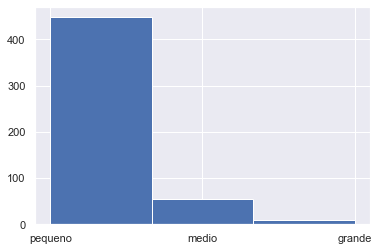

In [162]:
plt.hist(df['bins'], bins=3)

Você pode definir os grupos manualmente

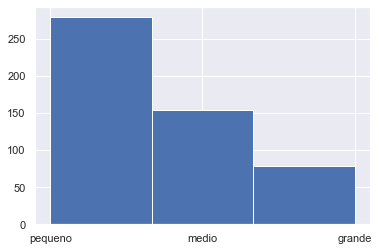

In [165]:
bins = [ 0, 30000, 50000, 10000000 ]
df['bin_cut_manual'] = pd.cut(df['salario'] , bins=bins, labels=labels, include_lowest=True)
plt.hist(df['bin_cut_manual'], bins=3)
plt.show()

### Binning por frequência ###
A categorização por frequência calcula o tamanho de cada caixa de forma que cada caixa contenha o (quase) mesmo número de observações, mas o intervalo da categoria irá variar. Podemos usar a função qcut() do Pandas. Podemos definir a parâmetro de precisão para definir o número de casas decimais.

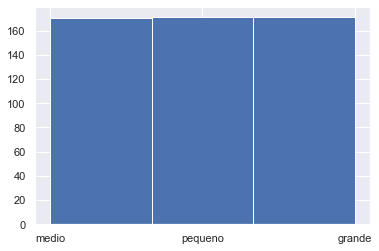

In [166]:
df['bin_qcut'] = pd.qcut(df['salario'], q=3, precision=1, labels=labels)
plt.hist(df['bin_qcut'], bins=3)
plt.show()

### Binning por Amostragem ###
A amostragem é outra técnica de binning de dados. Permite reduzir o número de amostras, agrupando valores semelhantes ou valores contíguos. Existem três abordagens para realizar a amostragem:
por bin significa: cada valor em um bin é substituído pelo valor médio do bin.
por bin median: cada valor bin é substituído por seu valor bin median.
por limite de bin: cada valor de bin é substituído pelo valor de limite mais próximo, ou seja, valor máximo ou mínimo do bin.

Para realizar a amostragem, a binned_statistic() função da scipy.statsembalagem pode ser usada. Esta função recebe duas matrizes como entrada, x_data e y_data, assim como as estatísticas a serem usadas (por exemplo, mediana ou média) e o número de bins a serem criados. A função retorna os valores das caixas, bem como as bordas de cada caixa.

In [167]:
from scipy.stats import binned_statistic 
x_data = np.arange (0, len (df)) 
y_data = df ['salario'] 
x_bins, bin_edges, misc = binned_statistic (y_data, x_data, statistic = "median", bins = 2)

Agora devemos aproximar cada valor da coluna **df['salario']** ao valor mediano do bin correspondente. Assim, convertemos as bordas do compartimento em um IntervalIndex, que recebe como índice as bordas esquerda e direita de cada intervalo. Em nosso caso, as bordas esquerdas começam no início das bordas da caixa e não contêm o último valor das bordas da caixa. Em vez disso, as bordas direitas começam a partir do segundo valor das bordas do compartimento e duram até o último valor.

In [168]:
bin_intervals = pd.IntervalIndex.from_arrays (bin_edges [: - 1], bin_edges [1:])

Podemos quantizar a coluna Salário definindo uma função set_to_median() que percorre os intervalos e, quando encontra o intervalo correto, retorna o valor médio.

In [174]:
def set_to_median (x, bin_intervals): 
    for interval in bin_intervals: 
        if x in interval: 
            return interval.mid

Usamos a função apply() para aplicar o set_to_median() à coluna Salário.

In [175]:
df['sampled_salario'] = df['salario'].apply(lambda x: set_to_median (x, bin_intervals))

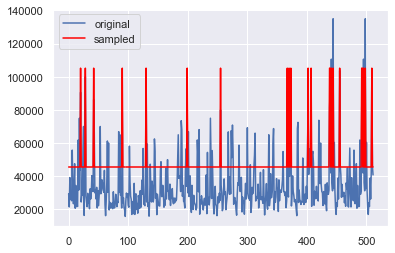

In [176]:
plt.plot (df ['salario'], label = 'original') 
plt.plot (df ['sampled_salario'], color = 'red', label = 'sampled') 
plt.legend () 
plt.show ()

Finalmente, podemos plotar os valores medianos. Podemos calcular os valores de y(y_bins) correspondentes aos valores categorizados (x_bins) como os valores no centro do intervalo de compartimentos.

In [177]:
y_bins = (bin_edges [: - 1] + bin_edges [1:]) / 2 
y_bins

array([ 45562.5, 105187.5])

Então planejamos:

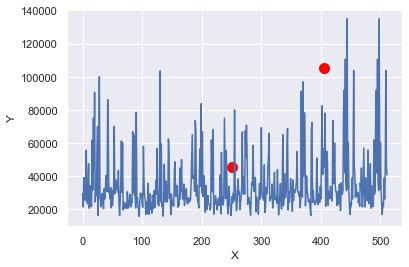

In [178]:
plt.plot (x_data, y_data) 
plt.xlabel ("X"); 
plt.ylabel ("Y")
plt.scatter (x_bins, y_bins, color = 'red', linewidth = 5) 
plt.show ()

### Calcule as quebras naturais nos dados ###

Podemos usar o pacote jenkspy, que contém uma única função, chamada jenks_breaks(), que calcula as quebras naturais de um array, explorando o algoritmo de Fisher-Jenks . Podemos instalar o pacote executando pip install jenkspy.

In [182]:
import jenkspy 
breaks = jenkspy.jenks_breaks (df['salario'], nb_class = 3)

Agora podemos usar a cut()função para transformar dados em rótulos.

In [185]:
df ['bin_cut_break'] = pd.cut(df['salario'], bins=breaks, labels = labels, include_lowest = True)

Agora podemos plotar o resultado:

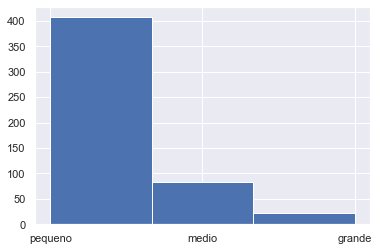

In [186]:
plt.hist(df['bin_cut_break'], bins=3)
plt.show()